In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical,plot_model

In [ ]:
# Importing the dataset
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing= fetch_california_housing()

In [ ]:
# Creating a DataFrame from the dataset
data=pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['MEDV']=california_housing.target

In [ ]:
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((16512, 8), (4128, 8))

In [ ]:
# Scaling the features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
# Building the ANN Model
model= Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(34, activation='relu'),
    Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 34)                2210      
                                                                 
 dense_5 (Dense)             (None, 1)                 35        
                                                                 
Total params: 2821 (11.02 KB)
Trainable params: 2821 (11.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


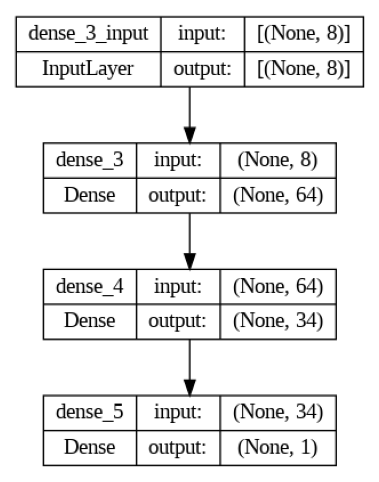

In [ ]:
# Plot the ANN Model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,6))
img= plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Training the model and saving its history
h=model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
465/465 [==============================] - 7s 7ms/step - loss: 0.8266 - val_loss: 0.4635
Epoch 2/100
465/465 [==============================] - 2s 3ms/step - loss: 0.4027 - val_loss: 0.4308
Epoch 3/100
465/465 [==============================] - 2s 3ms/step - loss: 0.3744 - val_loss: 0.4014
Epoch 4/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3641 - val_loss: 0.3850
Epoch 5/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3619 - val_loss: 0.3765
Epoch 6/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3315 - val_loss: 0.3593
Epoch 7/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3217 - val_loss: 0.3396
Epoch 8/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3172 - val_loss: 0.3356
Epoch 9/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3052 - val_loss: 0.3292
Epoch 10/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3008 - val_lo

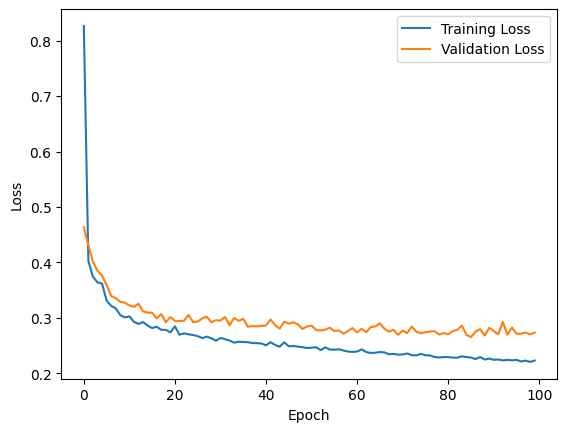

In [ ]:
plt.plot(h.history['loss'],label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss=model.evaluate(x_test,y_test)
print('Test Loss:', test_loss)

129/129 [==============================] - 1s 7ms/step - loss: 0.2698
Test Loss: 0.26982346177101135
